# 20240324作业

这是蒋子凌2024年3月24日CV课程的作业，内容是练习手写实现lenna.png的灰度化和二值化，以及实现最邻近插值。

首先导入函数库，其次定义函数，最后出图。

## 导入函数库

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import cv2  # 已经安装但是import失败，原因不详

## 定义函数

In [3]:
def my_brg2gray(img):
    '''
    grayscale the BRG img and return the gray img
    Gray = R0.3+G0.59+B0.11
    '''
    h,w = img.shape[:2]  # get the height and width of the img
    img_gray = np.zeros([h,w], dtype=img.dtype)  # create an empty img based on the shape of the given img
    for i in range(h):
        for j in range(w):
            pixel = img[i,j]
            # print(pixel)
            # img_gray[i,j] = pixel[0]*0.3 + pixel[1]*0.59 + pixel[2]*0.11   # 0.3R 0.59G 0.11B
            img_gray[i,j] = pixel[0]*0.11 + pixel[1]*0.59 + pixel[2]*0.3   # 0.11B 0.59G 0.3R, for img read in by opencv
    return img_gray

In [4]:
def my_rgb2gray(img):
    '''
    grayscale the RGB img and return the gray img
    Gray = R0.3+G0.59+B0.11
    '''
    h,w = img.shape[:2]  # get the height and width of the img
    img_gray = np.zeros([h,w], dtype=img.dtype)  # create an empty img bosed on the shape of the given img
    for i in range(h):   # 
        for j in range(w):
            pixel = img[i,j]
            # print(pixel)
            img_gray[i,j] = pixel[0]*0.3 + pixel[1]*0.59 + pixel[2]*0.11   # 0.3R 0.59G 0.11B
            # img_gray[i,j] = pixel[0]*0.11 + pixel[1]*0.59 + pixel[2]*0.3   # 0.11B 0.59G 0.3R, for img read in by opencv
    return img_gray

In [5]:
def my_gray2binary(img_gray):
    '''
    binarization of grayscaled img
    '''
    h, w = img_gray.shape  # 灰度图的形状只有高和宽两个维度，不用切片了
    for i in range(h):
        for j in range(w):
            if (img_gray[i, j] <= 0.5):
                img_gray[i, j] = 0
            else:
                img_gray[i, j] = 1
    return img_gray

In [6]:
# 占用行数更少的二值化方法
# img_binary = np.where(img_gray >= 0.5, 1, 0)

In [7]:
def my_NNI(img, targetH=800, targetW=800):
    '''
    使用Nearest Neighbor Interpolatioin实现图像分辨率的改变
    '''
    h, w, channels = img.shape
    emptyImg = np.zeros([targetH,targetW,channels], dtype=np.uint8)
    scaleH = h/targetH  # 计算缩放比例
    scaleW = w/targetW
    for i in range(targetH):
        for j in range(targetW):
            x = int(i*scaleH + 0.5)  # 根据缩放比例计算NI后的图对应于原图的位置，+0.5是为了减小向下取整的误差，类似于用int实现round
            y = int(j*scaleW + 0.5)
            emptyImg[i,j] = img[x,y]
    return emptyImg

In [8]:
def function(img):
    '''
    老师的代码
    '''
    height,weight,channels = img.shape
    emptyImage = np.zeros((800,800,channels), np.uint8)
    sh = 800/height
    sw = 800/weight
    for i in range(800):
        for j in range(800):
            x = int(i/sh + 0.5)
            y = int(j/sw + 0.5)
            emptyImage[i,j] = img[x,y]
    return emptyImage

## 用plt实现

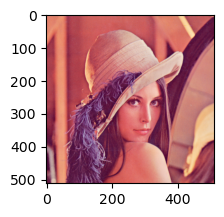

In [9]:
# 图1 原图
plt.subplot(221)  # 2*2网格第一张图
img = plt.imread('lenna.png')  # 读入原图
plt.imshow(img)

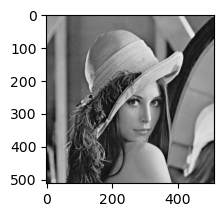

In [10]:
# 图2 灰度化
plt.subplot(222)  # 2*2网格第2张图
img_gray = my_rgb2gray(img)  # plt读取的图像是GRB，不是BRG
# plt.imshow(img_gray)  # 用plt输出灰度化图像必须要cmap='gray'不然是绿色的
plt.imshow(img_gray, cmap='gray')  # 用plt输出灰度化图像必须要cmap='gray'不然是绿色的

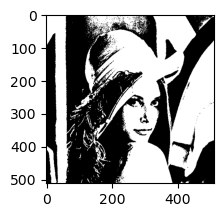

In [11]:
# 图3 二值化
plt.subplot(223)  # 2*2网格第3张图
img_binary = my_gray2binary(img_gray)  # 二值化函数的输入是灰度图，不是原图
plt.imshow(img_binary, cmap='gray')  # 用plt输出二值化化图像也必须要cmap='gray'不然是绿色的

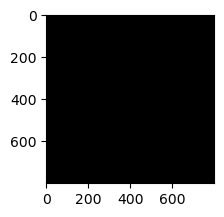

In [13]:
# 图4 最邻近插值 有bug，出图是黑的，所有值都是0
plt.subplot(224)  # 2*2网格第4张图
img_NNI = my_NNI(img)  # 调用自己的函数实现最邻近插值，有bug，出图是黑的，所有值都是0
# img_NNI = function(img)  # 调用老师的函数实现最邻近插值，有bug，出图是黑的，所有值都是0
# img_NNI
plt.imshow(img_NNI)

## 用opencv实现

opencv-python已经安装但是import失败，原因不详